# Map of study area

Alex Koiter

## Load Libraries

In [ ]:
library(tidyverse)


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Linking to GEOS 3.10.2, GDAL 3.4.3, PROJ 8.2.1; sf_use_s2() is TRUE

## Important coordinants

Regional site location

In [ ]:
site <- st_sfc(st_point(c(-99.924176, 50.056015)), crs = 4326)
box = c(xmin = -99.99, xmax = -99.924176 + 0.12, ymax = 50.056015 +.065, ymin = 50.056015 - 0.065)


Study plot locations

In [ ]:
# sites <- st_as_sf(data.frame(site = c(1,2,3,4), lat = c(50.052525, 50.052209, 50.059208, 50.060235), long = c(-99.924242, -99.918429, -99.912849, -99.931591)), coords = c("long", "lat"), crs = 4362)
                                                                                              
sites <- data.frame(site = c(1,2,3,4), lat = c(50.052525, 50.052209, 50.059208, 50.060235), long = c(-99.924242, -99.918429, -99.912849, -99.931591))


## Land use data of region

### Get data

In [ ]:
minnedosa_data <- "lcv_minnedosa_2004_2006_shp"
if (file.exists(minnedosa_data)) {
  print("The data already exists!")
} else {
  download.file("https://mli.gov.mb.ca/landuse/shp_zip_files/lcv_minnedosa_2004_2006_shp.zip", 
                destfile = "lcv_minnedosa_2004_2006_shp.zip")
  unzip("lcv_minnedosa_2004_2006_shp.zip", exdir = "lcv_minnedosa_2004_2006_shp")
}


[1] "The data already exists!"

[1] "The data already exists!"

In [ ]:
sf_use_s2(FALSE)


Spherical geometry (s2) switched off

Reading layer `lcv_brandon_2006' from data source 
  `/home/alex/Dropbox/MBFI/MBFI riparian study/riparian-grazing-manuscript/notebooks/lcv_brandon_2006_shp/lcv_brandon_2006.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 145146 features and 5 fields
Geometry type: POLYGON
Dimension:     XY
Bounding box:  xmin: 429971 ymin: 5427260 xmax: 510011 ymax: 5542070
Projected CRS: UTM
Reading layer `lcv_minnedosa_2004_2006' from data source 
  `/home/alex/Dropbox/MBFI/MBFI riparian study/riparian-grazing-manuscript/notebooks/lcv_minnedosa_2004_2006_shp/lcv_minnedosa_2004_2006.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 160653 features and 5 fields
Geometry type: POLYGON
Dimension:     XY
Bounding box:  xmin: 429972 ymin: 5542070 xmax: 549972 ymax: 5656880
Projected CRS: UTM

although coordinates are longitude/latitude, st_intersection assumes that they
are planar

all geometries

## Canada

In [ ]:
canada <- ne_states(country = "Canada", returnclass = "sf") %>%
  st_transform(crs = 3348) 


## Maps

### Land use

In [ ]:
p3 <- ggplot() +
  theme_bw() +
  geom_sf(data = land, aes(fill = Land_use), lwd = 0) +
  scale_fill_manual(values=c("#458B00",  "#CDAD00", "#006400","#009ACD", "#0096D194",  "#C1CDCD"), name = "Land use") +
  geom_point(data = sites, aes(x = long, y = lat), shape = 23, colour = "red", fill = "red", size = 2) +
  coord_sf(ylim = c(49.992, 50.1), xlim = c(-99.965, -99.80418), crs = 4326) +
  scale_y_continuous(expand = c(0,0)) +
  scale_x_continuous(expand = c(0,0)) +
  labs(tag = "b)") +
  annotation_scale(location = "bl",
                   height = unit(0.05, "cm")) +
  annotation_north_arrow(location = "br", 
                         height = unit(0.5, "cm"),
                         width = unit(0.5, "cm")) +
  theme(axis.text = element_blank(),
        axis.ticks = element_blank(),
        axis.title = element_blank(),
        plot.margin = unit(c(0,0,0,0), "mm"))


### Open street

not used

In [ ]:
p2 <- ggplot(site) +
  annotation_map_tile(type = "osm", zoom = 15) +
  geom_point(data = sites, aes(x = long, y = lat), shape = 23, colour = "red", fill = "red", size = 1) +
  #coord_sf(ylim = c(50.056015 +.02, 50.056015 - 0.02), xlim = c(-99.924176 - 0.04, -99.924176 + 0.04), crs = 4326) +
  coord_sf(ylim = c(50.056015 +.01, 50.056015 +.065), xlim = c(-99.924176 - 0.02, -99.924176 + 0.02), crs = 4326) +
  annotation_scale(location = "bl",
                   height = unit(0.05, "cm")) +
  annotation_north_arrow(location = "br", 
                         height = unit(0.5, "cm"),
                         width = unit(0.5, "cm")) +
  theme(axis.text = element_blank(),
        axis.ticks = element_blank(),
        axis.title = element_blank(),
        plot.margin = unit(c(0,0,0,0), "mm"))


### Canada

In [ ]:
p1 <- ggplot() +
  theme_bw() +
  layer_spatial(canada, fill = "white") +
  layer_spatial(site, shape = 23, colour = "red", fill = "red", size = 2) +
  theme(axis.text = element_blank(),
        axis.ticks = element_blank(),
        axis.title = element_blank(),
        plot.margin = unit(c(0,0,0,0), "mm"),
        panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(),
        #panel.border = element_blank(),
        panel.background = element_blank())


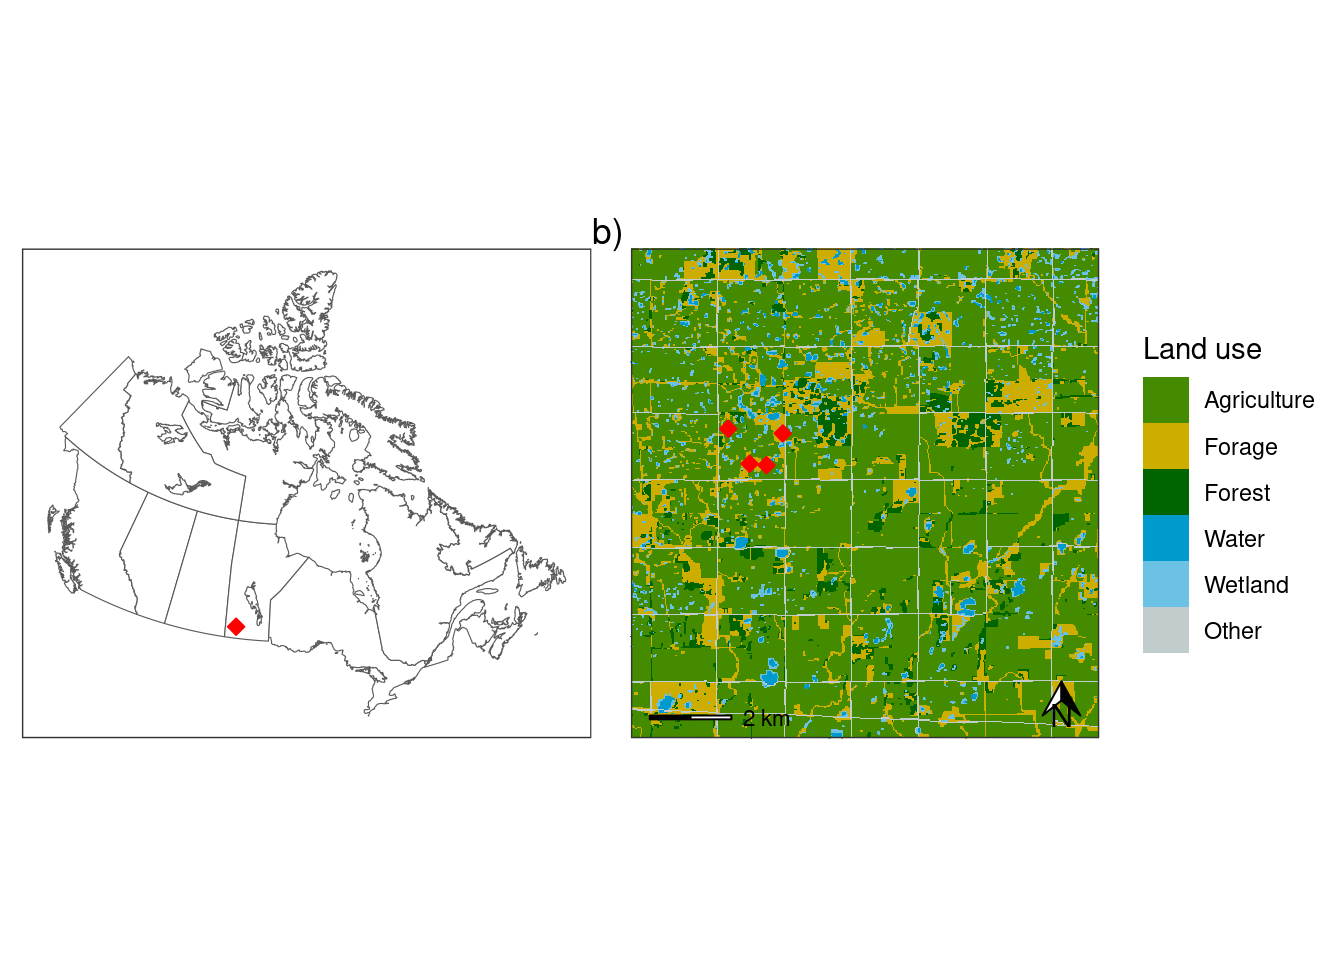

In [ ]:
#|
p1 + p3 + plot_layout(guides = "collect") & theme(legend.position = "right")

#ggsave(filename = "Figures/Maps.png", plot = p4, height = 75, width = 180, units = "mm", dpi = 600)


In [ ]:
mb_river <- ne_download(scale = 10,  type = 'rivers_lake_centerlines', category = "physical", returnclass = "sf") %>%
  st_transform(crs = 4326) %>%
  st_crop(st_bbox(c(xmin = -101.5889, ymin = 48.99267, 
                    xmax = -95.15399, ymax = 51.399), 
                  crs = st_crs(.)))


Reading layer `ne_10m_rivers_lake_centerlines' from data source 
  `/tmp/RtmpVf4EHf/ne_10m_rivers_lake_centerlines.shp' using driver `ESRI Shapefile'
Simple feature collection with 1473 features and 38 fields
Geometry type: MULTILINESTRING
Dimension:     XY
Bounding box:  xmin: -164.9035 ymin: -52.15775 xmax: 177.5204 ymax: 75.79348
Geodetic CRS:  WGS 84

although coordinates are longitude/latitude, st_intersection assumes that they
are planar

all geometries

Reading layer `ne_10m_lakes' from data source `/tmp/RtmpVf4EHf/ne_10m_lakes.shp' using driver `ESRI Shapefile'
Simple feature collection with 1355 features and 41 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: -165.9656 ymin: -50.66967 xmax: 177.1544 ymax: 81.95521
Geodetic CRS:  WGS 84

although coordinates are longitude/latitude, st_intersection assumes that they
are planar

all geometries

although coordinates are longitude/latitude, st_intersection assumes that they
are planar

all geometries

although coordinates are longitude/latitude, st_intersection assumes that they
are planar

all geometries

Warning in st_point_on_surface.sfc(sf::st_zm(x)): st_point_on_surface may not
give correct results for longitude/latitude data

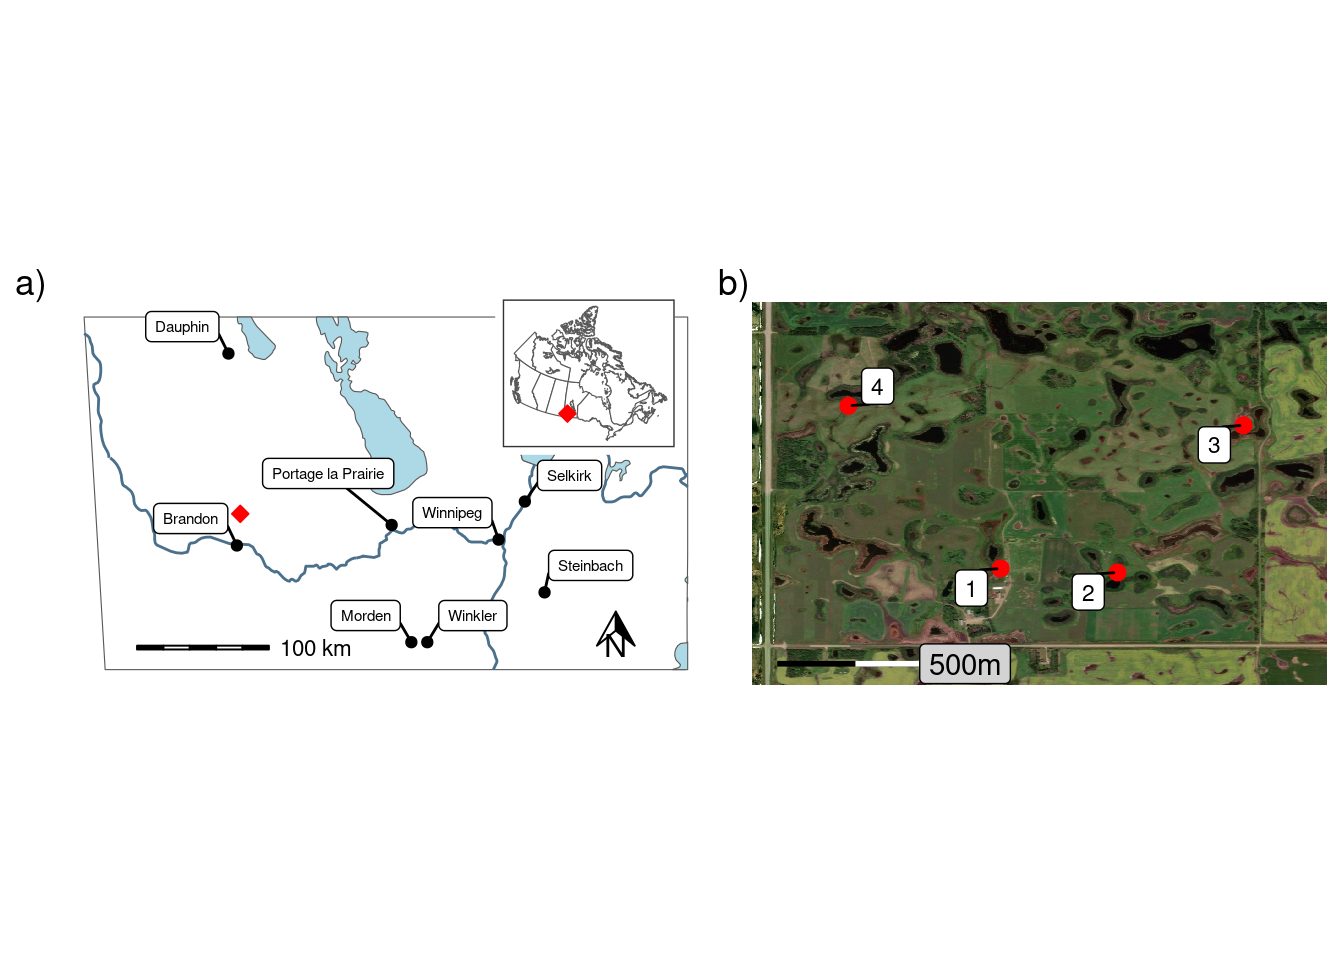

In [ ]:

p6 <- p4 + inset_element(p1, left = 0.6, bottom = 0.6, right = 1, top = 1) + p5
p6
